In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans

Leemos datos

In [2]:
X_train = np.loadtxt("X_train", delimiter=",")
X_test = np.loadtxt("X_test", delimiter=",")
y_test = np.loadtxt("y_test", delimiter=",")
y_train = np.loadtxt("y_train", delimiter=",")

In [3]:
columnas_xx = [
    "ExternalRiskEstimate",
    "NetFractionRevolvingBurden",
    "AverageMInFile",
    "MSinceOldestTradeOpen",
    "PercentTradesWBalance",
    "PercentInstallTrades",
    "NumSatisfactoryTrades",
    "NumTotalTrades",
    "PercentTradesNeverDelq",
    "MSinceMostRecentInqexcl7days",
]

In [4]:
columnas_data = [
    "ExternalRiskEstimate",
    "NetFractionRevolvingBurden",
    "AverageMInFile",
    "MSinceOldestTradeOpen",
    "PercentTradesWBalance",
    "PercentInstallTrades",
    "NumSatisfactoryTrades",
    "NumTotalTrades",
    "PercentTradesNeverDelq",
    "MSinceMostRecentInqexcl7days",
    "RiskPerformance",
]

In [5]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
y = y.reshape(-1, 1)
data = np.concatenate((X, y), axis=1)

In [6]:
X_df = pd.DataFrame(X, columns=columnas_xx)
X_train_df = pd.DataFrame(X_train, columns=columnas_xx)

data_df = pd.DataFrame(data, columns=columnas_data)

1. PCA fitting process and analysis. (0.5 pts)

PCA en 3D

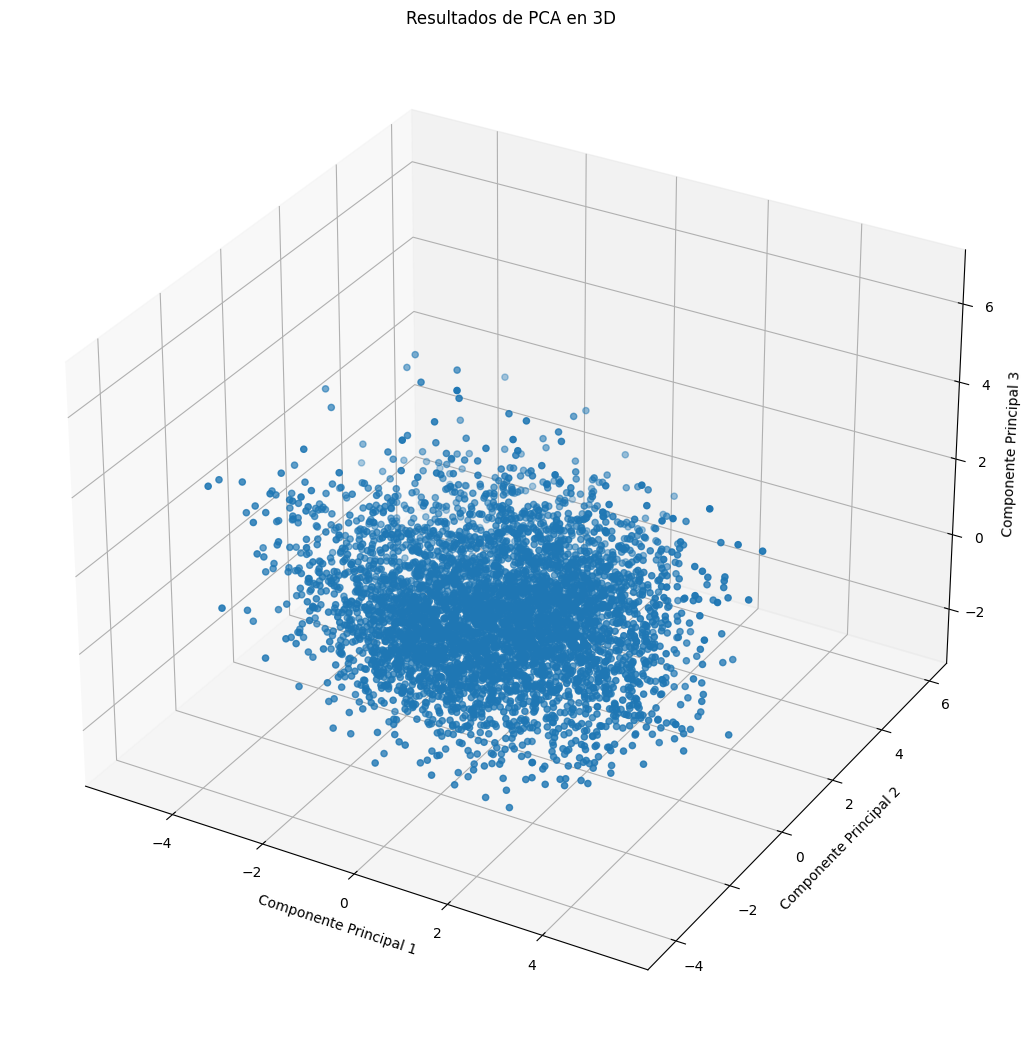

In [7]:
# Realizamos PCA
pca = PCA(n_components=3)
pca_resultados = pca.fit_transform(X_df)

# Creamos un DataFrame para los resultados de PCA
df_pca_3d = pd.DataFrame(
    data=pca_resultados,
    columns=[
        "Componente Principal 1",
        "Componente Principal 2",
        "Componente Principal 3",
    ],
)

# Visualizamos los resultados en un gráfico de dispersión en 3D
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
ax.scatter(
    df_pca_3d["Componente Principal 1"],
    df_pca_3d["Componente Principal 2"],
    df_pca_3d["Componente Principal 3"],
)

# Etiquetas de los ejes
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")

# Título del gráfico
ax.set_title("Resultados de PCA en 3D")

# Mostramos el gráfico
plt.show()

Vamos a entrenar un modelo con esos datos, por ejemplo KNN, que se ve afectado por la maldición de la dimensionalidad

In [8]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    pca_resultados, y, test_size=0.2, random_state=42
)

# Crear un clasificador k-NN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 13, 15, 17, 31],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 5, 7, 9],
}

# Crear un objeto GridSearchCV
clf = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Entrenar el modelo usando GridSearchCV
clf.fit(X_train, y_train.ravel())

# Obtener los mejores hiperparámetros
best_params = clf.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 17, 'p': 9, 'weights': 'uniform'}


In [9]:
knn_model = KNeighborsClassifier(**clf.best_params_)
knn_model.fit(X_train, y_train.ravel())  # TODO
accuracy_test = accuracy_score(y_test, knn_model.predict(X_test))
accuracy_train = accuracy_score(y_train, knn_model.predict(X_train))
print(f"Accuracy, train = {accuracy_train} test = {accuracy_test}")

Accuracy, train = 0.7372281234193222 test = 0.7118301314459049


El resultado es parecido al de sin PCA. 

Porcentaje de varianza explicada (como de bien se explican los datos)

In [10]:
pve = pca.explained_variance_ratio_

print("Porcentaje de Varianza Explicada (PVE) para cada compouente:", pve)
print("PVE total", sum(pve))

Porcentaje de Varianza Explicada (PVE) para cada compouente: [0.29614596 0.18597677 0.15084365]
PVE total 0.6329663787553936


PCA en 2D

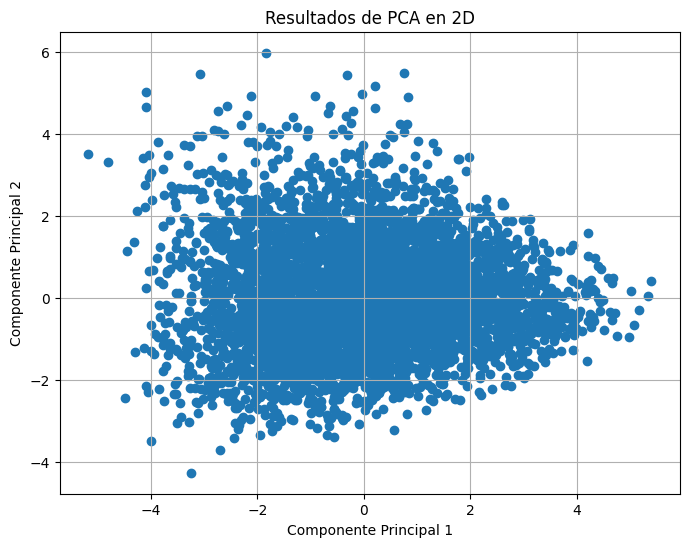

In [11]:
# Realizamos PCA
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(X_df)

# Creamos un DataFrame para los resultados de PCA
df_pca_2d = pd.DataFrame(
    data=pca_resultados, columns=["Componente Principal 1", "Componente Principal 2"]
)

# Visualizamos los resultados en un gráfico de dispersión en 2D
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df_pca_2d["Componente Principal 1"], df_pca_2d["Componente Principal 2"])

# Etiquetas de los ejes
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Título del gráfico
plt.title("Resultados de PCA en 2D")

# Mostramos el gráfico
plt.grid(True)
plt.show()

Entrenemos KNN otra vez

In [12]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    pca_resultados, y, test_size=0.2, random_state=42
)

# Crear un clasificador k-NN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 13, 15, 17, 31],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 5, 7, 9],
}

# Crear un objeto GridSearchCV
clf = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Entrenar el modelo usando GridSearchCV
clf.fit(X_train, y_train.ravel())

# Obtener los mejores hiperparámetros
best_params = clf.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 31, 'p': 9, 'weights': 'uniform'}


In [13]:
knn_model = KNeighborsClassifier(**clf.best_params_)
knn_model.fit(X_train, y_train.ravel())  # TODO
accuracy_test = accuracy_score(y_test, knn_model.predict(X_test))
accuracy_train = accuracy_score(y_train, knn_model.predict(X_train))
print(f"Accuracy, train = {accuracy_train} test = {accuracy_test}")

Accuracy, train = 0.7220536165907941 test = 0.704752275025278


PVE 

In [14]:
pve = pca.explained_variance_ratio_

print("Porcentaje de Varianza Explicada (PVE) para cada compouente:", pve)
print("PVE total", sum(pve))

Porcentaje de Varianza Explicada (PVE) para cada compouente: [0.29614596 0.18597677]
PVE total 0.4821227310528343


Los resultados son muy parecidos y hemos conseguido bajar la dimensionalidad de forma considerable. Hacer PCA es buena idea para este problema. 

PCA 1D

In [15]:
pca = PCA(n_components=1)
pca_resultados = pca.fit_transform(X_df)

Entrenamos KNN

In [16]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    pca_resultados, y, test_size=0.2, random_state=42
)

# Crear un clasificador k-NN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 13, 15, 17, 31],
    "weights": ["uniform", "distance"],
    "p": [1, 2, 3, 5, 7, 9],
}

# Crear un objeto GridSearchCV
clf = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

# Entrenar el modelo usando GridSearchCV
clf.fit(X_train, y_train.ravel())

# Obtener los mejores hiperparámetros
best_params = clf.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}


In [17]:
knn_model = KNeighborsClassifier(**clf.best_params_)
knn_model.fit(X_train, y_train.ravel())  # TODO
accuracy_test = accuracy_score(y_test, knn_model.predict(X_test))
accuracy_train = accuracy_score(y_train, knn_model.predict(X_train))
print(f"Accuracy, train = {accuracy_train} test = {accuracy_test}")

Accuracy, train = 0.7190187152250885 test = 0.6814964610717897


Ahora ha bajado un poco el acuraccy

PVE

In [18]:
pve = pca.explained_variance_ratio_
print("Porcentaje de Varianza Explicada (PVE) para cada compouente:", pve)
print("PVE total", sum(pve))

Porcentaje de Varianza Explicada (PVE) para cada compouente: [0.29614596]
PVE total 0.2961459566340858


Vamos a hacer PCA en varias dimensiones y a graficar el acuraccy de KNN y el PVE para esas dimensiones

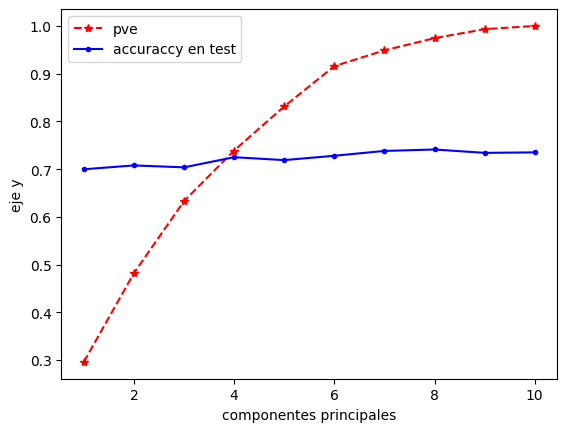

In [19]:
d = 10

pves = []
acc_test = []

for i in range(d):
    pca = PCA(n_components=i + 1)
    pca_resultados = pca.fit_transform(pd.DataFrame(X, columns=columnas_xx))
    X_train, X_test, y_train, y_test = train_test_split(
        pca_resultados, y, test_size=0.2, random_state=42
    )
    model = KNeighborsClassifier(n_neighbors=33)
    model.fit(X_train, y_train.ravel())
    accuracy_test = accuracy_score(y_test, model.predict(X_test))
    pve = pca.explained_variance_ratio_

    pves.append(sum(pve))
    acc_test.append(accuracy_test)

dimensiones = range(1, d + 1)

# Plot the results
plt.plot(dimensiones, pves, "r*--", label="pve")
plt.plot(dimensiones, acc_test, "b.-", label="accuraccy en test")
plt.xlabel("componentes principales")
plt.ylabel("eje y")
plt.legend()
plt.show()

El acuraccy no cambia mucho con el numero de componentes principales

Identification and fitting process of clustering algorithms. (0.75 pts)

K means

Usemos el método del codo para elegir el numero de clusters

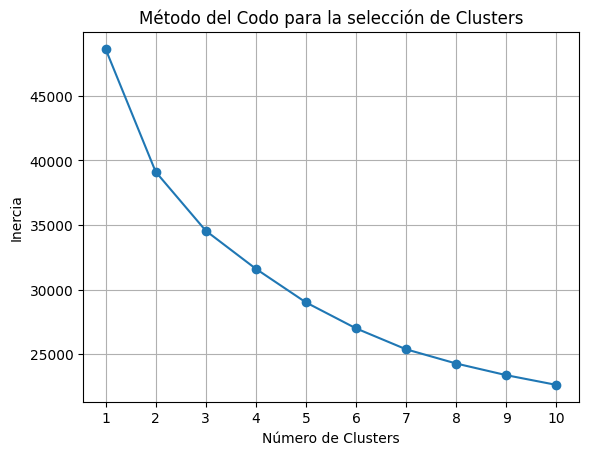

In [20]:
inercia = []

# Rango de número de clusters a probar
rango_clusters = range(1, 11)  # Probamos desde 1 hasta 10 clusters

# Calcular la inercia para cada número de clusters
for k in rango_clusters:
    # Crear una instancia del modelo de clustering
    modelo_clustering = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Ajustar el modelo a tus datos y calcular la inercia
    modelo_clustering.fit(X_df)
    inercia.append(modelo_clustering.inertia_)

# Graficar la inercia en función del número de clusters
plt.plot(rango_clusters, inercia, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para la selección de Clusters")
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()

la inercia es: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. Se toma este valor en lugar el diámetro del cluster.

Parece que 2 es el numero de clusters que nos interesa.

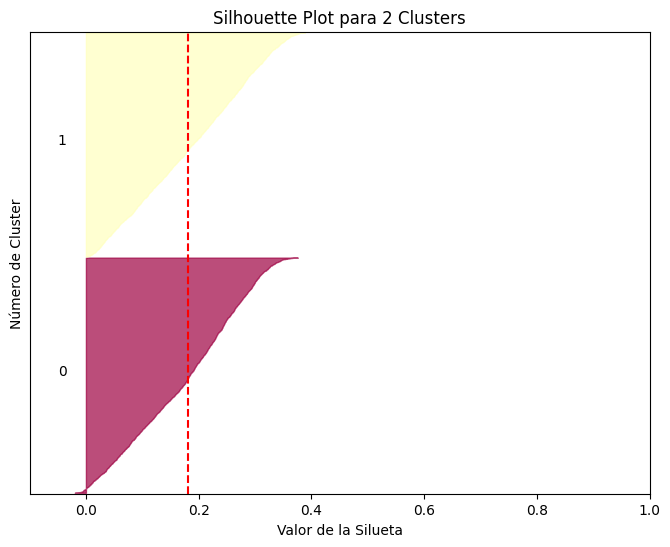

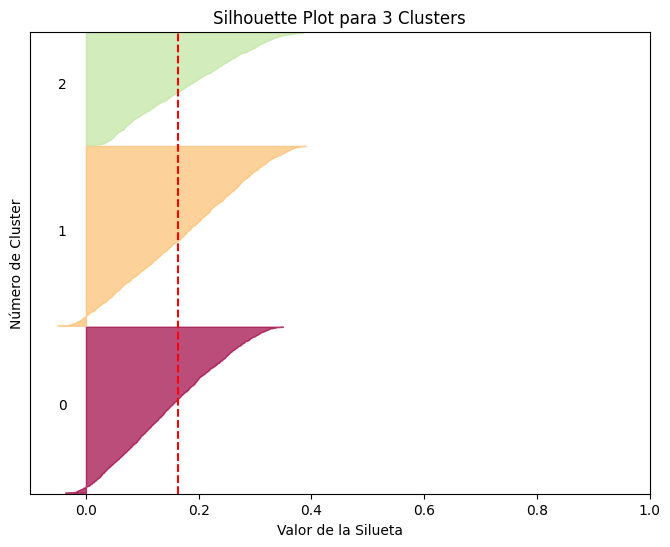

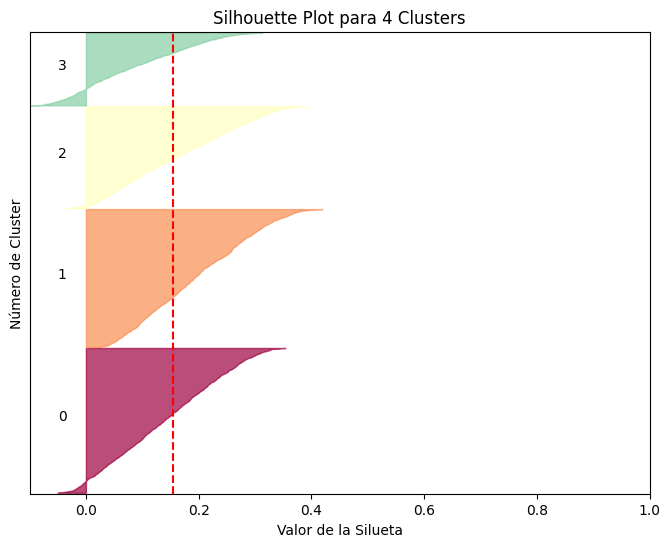

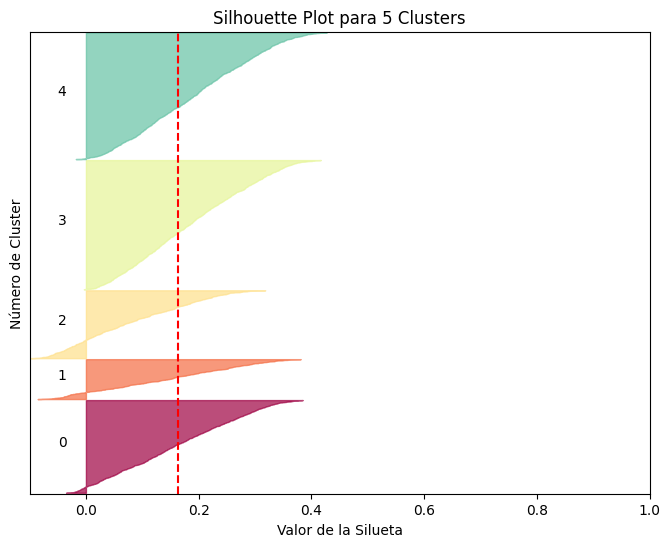

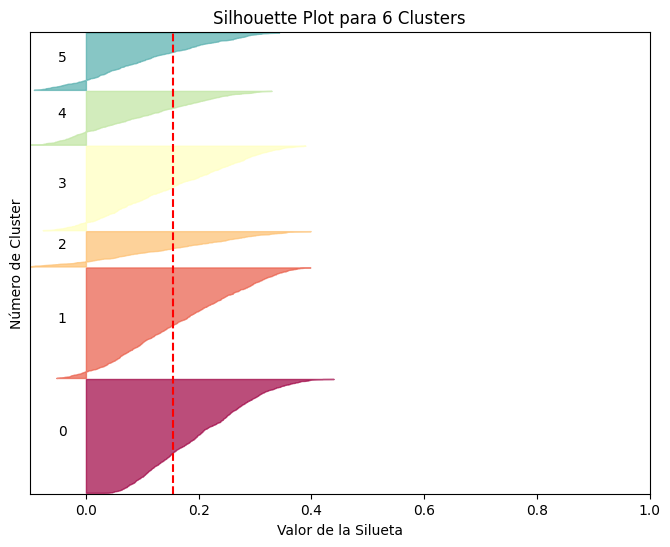

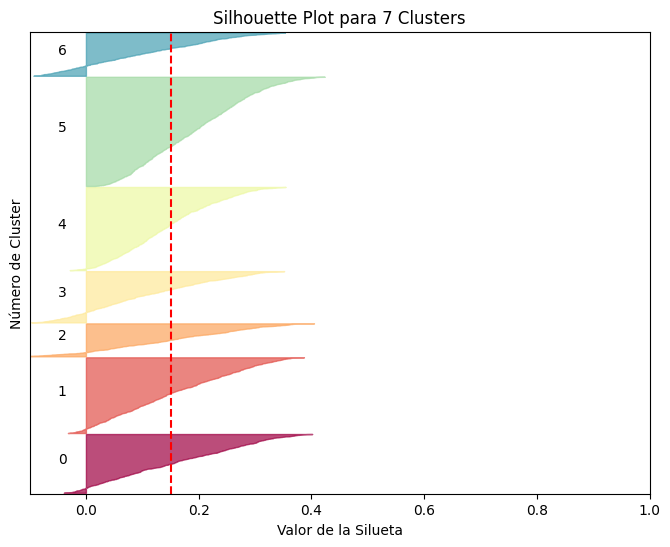

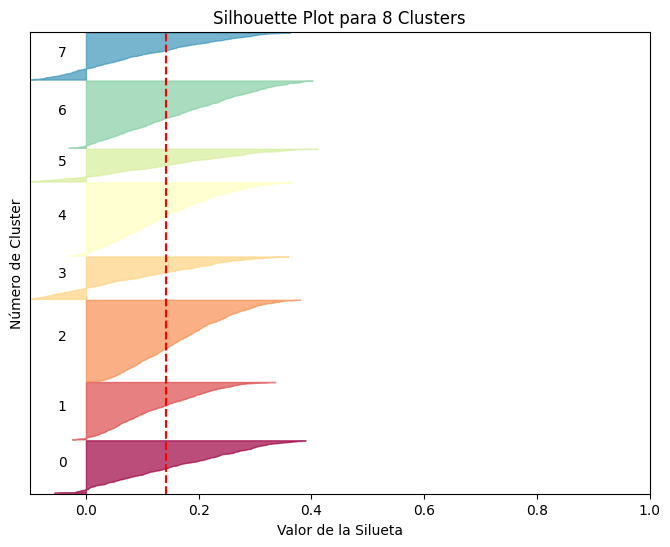

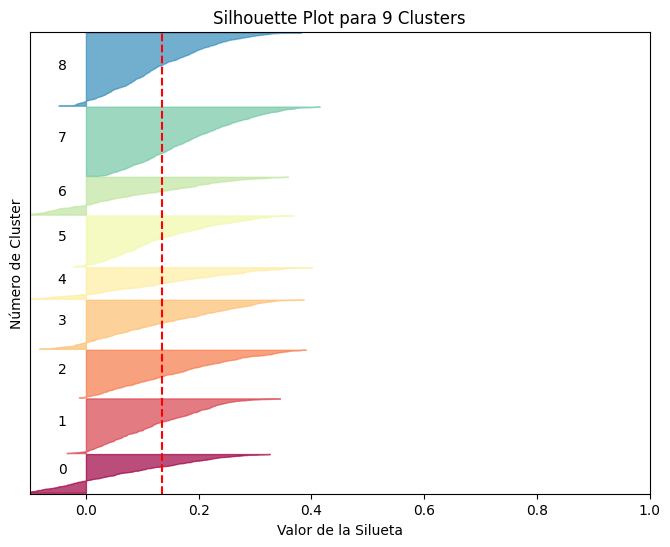

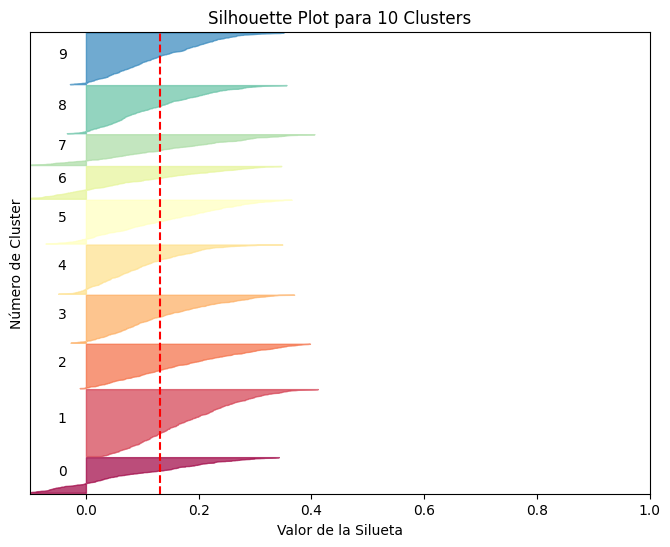

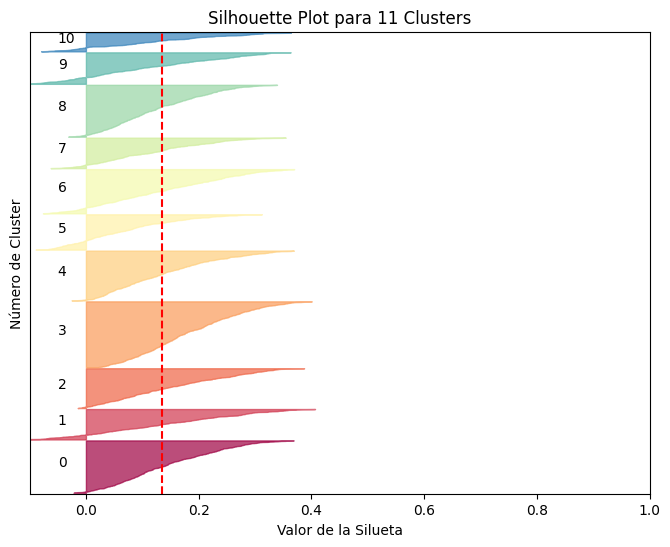

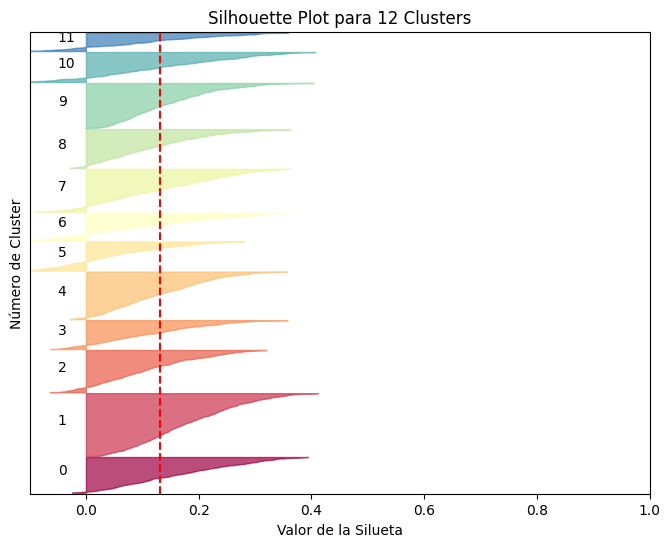

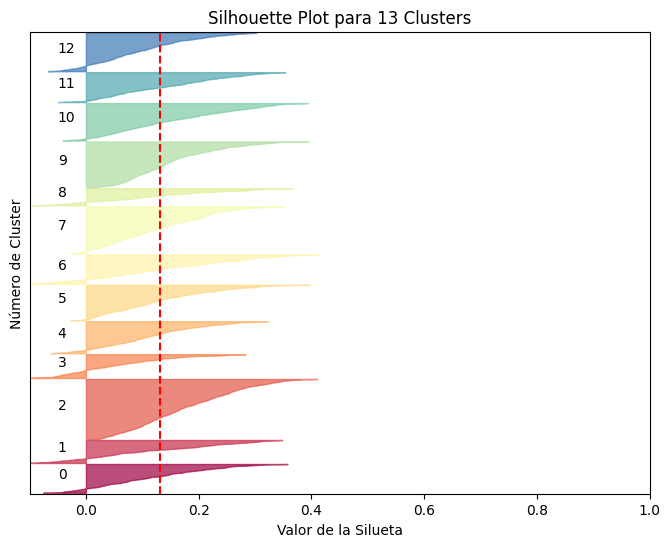

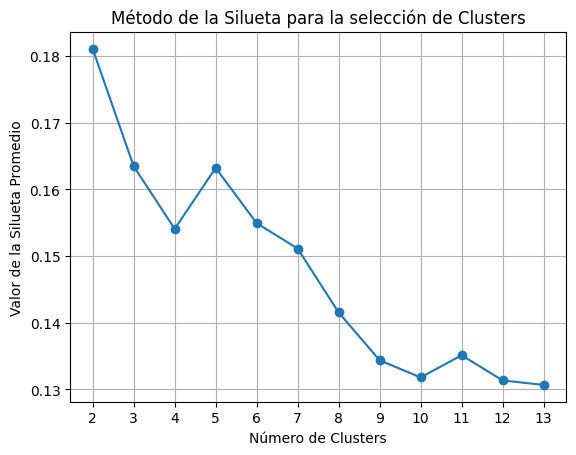

In [21]:
silueta_promedio = []


rango_clusters = range(2, 14)  # Probamos desde 2 hasta 15 clusters

for k in rango_clusters:

    modelo_clustering = KMeans(n_clusters=k, n_init=10, random_state=42)

    etiquetas = modelo_clustering.fit_predict(X_df)

    valor_silueta = silhouette_score(X_df, etiquetas)

    valores_silueta_muestra = silhouette_samples(X_df, etiquetas)

    silueta_promedio.append(valor_silueta)

    datos_ordenados = [
        (etiqueta, valor) for etiqueta, valor in zip(etiquetas, valores_silueta_muestra)
    ]
    datos_ordenados.sort(key=lambda x: x[0])

    plt.figure(figsize=(8, 6))
    plt.title(f"Silhouette Plot para {k} Clusters")
    plt.xlabel("Valor de la Silueta")
    plt.ylabel("Número de Cluster")

    y_lower = 10
    for i in range(k):

        cluster_i_values = [
            valor for etiqueta, valor in datos_ordenados if etiqueta == i
        ]
        cluster_i_values.sort()

        size_cluster_i = len(cluster_i_values)
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(i / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_i_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=valor_silueta, color="red", linestyle="--")
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_df) + (k + 1) * 10])
    plt.show()

# Graficar la silueta promedio en función del número de clusters
plt.plot(rango_clusters, silueta_promedio, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Valor de la Silueta Promedio")
plt.title("Método de la Silueta para la selección de Clusters")
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()

Según el método de la silueta, el mejor numero de clusters es 2. Además es el único donde no hay siluetas negativas. 

K-Means optimo

In [22]:
# Aplicamos K-Means para clustering
n_clusters = 2  # Número de clusters deseado
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
kmeans.fit(X_df)

X_df_new = X_df.copy()
X_df_new["Cluster"] = kmeans.labels_

# Puedes explorar los resultados, por ejemplo, viendo la distribución de los datos en cada cluster
print(X_df_new["Cluster"].value_counts())

# También puedes examinar los centroides de los clusters
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=columnas_xx)
print(centroides)

0    2533
1    2410
Name: Cluster, dtype: int64
   ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
0              0.632992                   -0.586069        0.393484   
1             -0.663267                    0.619754       -0.425100   

   MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
0               0.411983              -0.555029             -0.287180   
1              -0.437168               0.604506              0.305522   

   NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
0               0.329525        0.293274                0.362885   
1              -0.334518       -0.298830               -0.369797   

   MSinceMostRecentInqexcl7days  
0                      0.192877  
1                     -0.202299  


¿que pasa si usamos el clustering para clasificar? 

In [23]:
print(accuracy_score(X_df_new["Cluster"].values, y))

0.7088812462067571


Hierarchical tree clustering: Vamos a implementar Agnes

AGNES

Silhouette

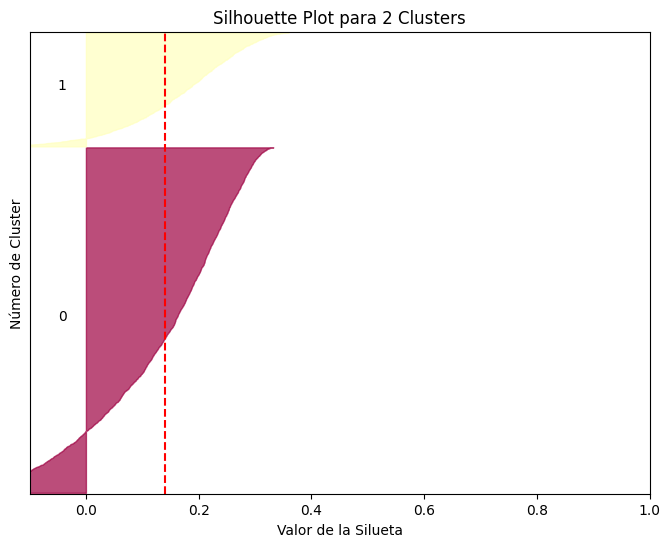

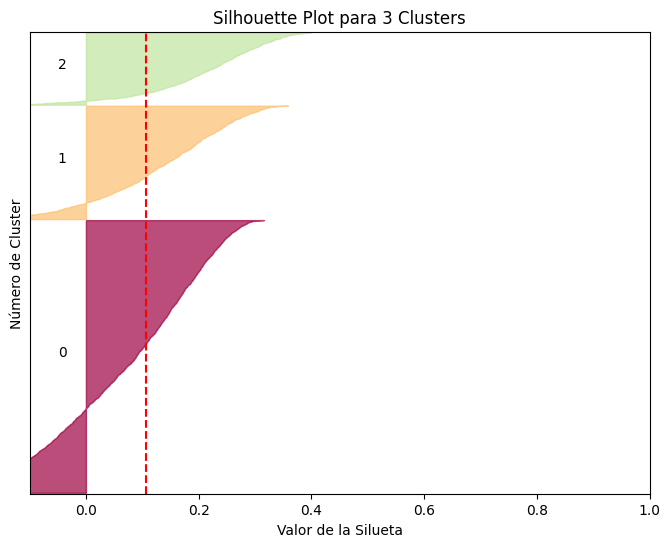

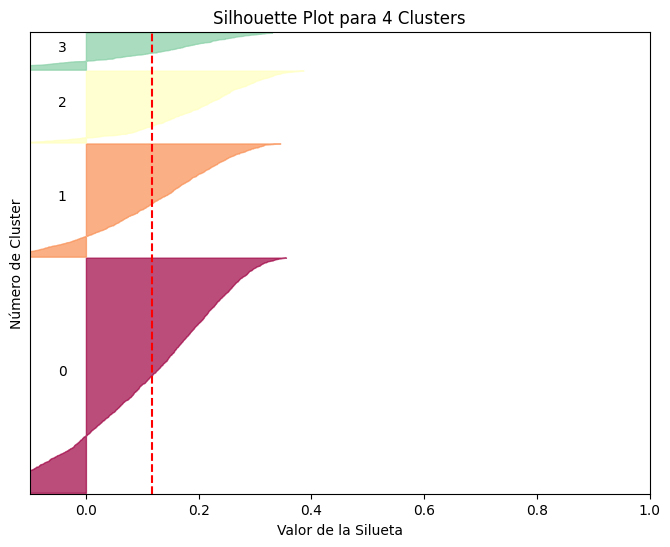

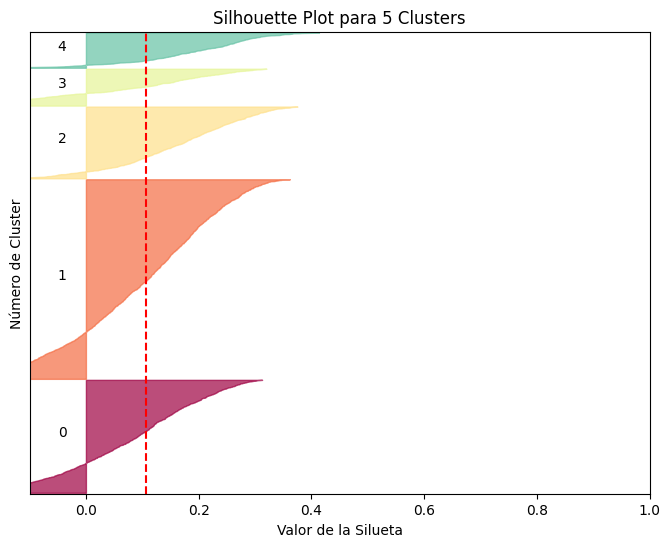

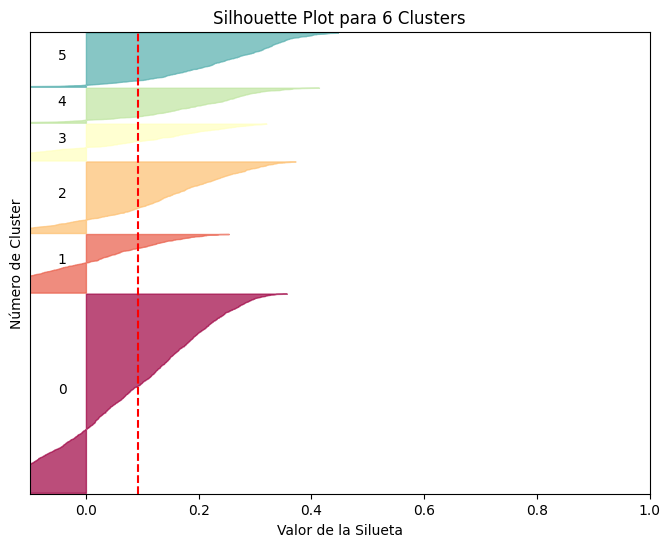

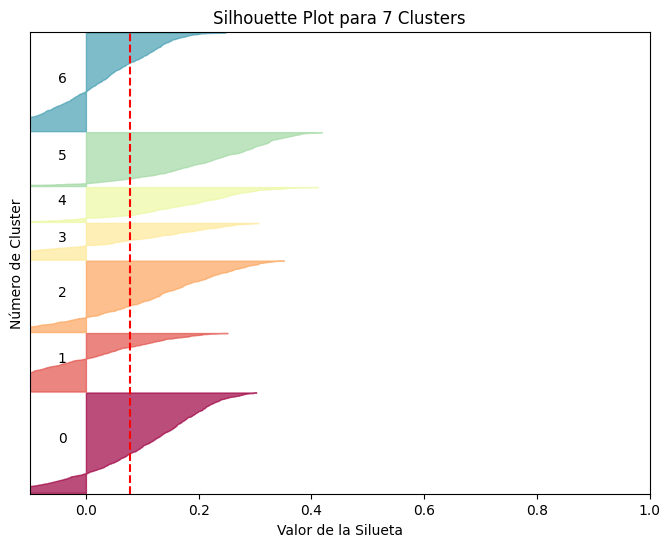

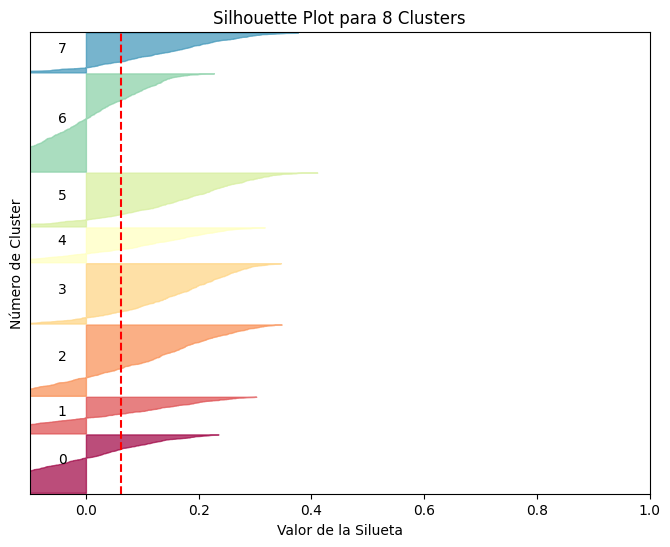

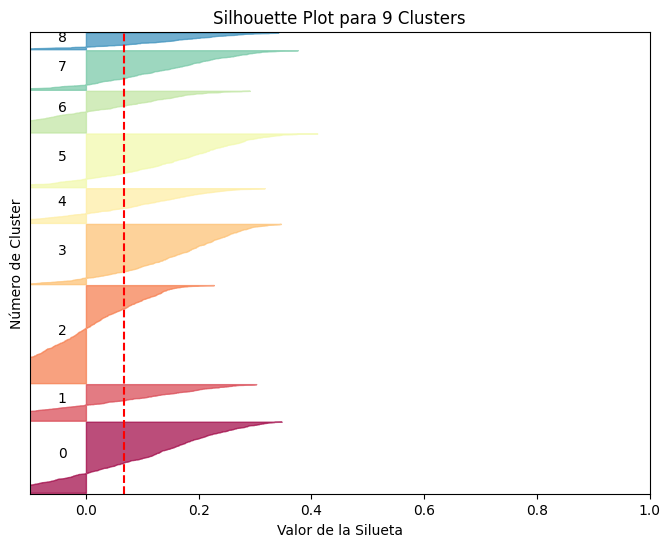

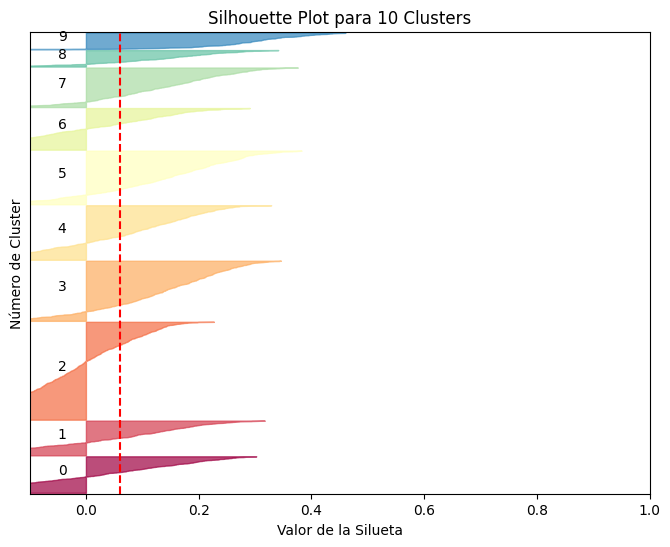

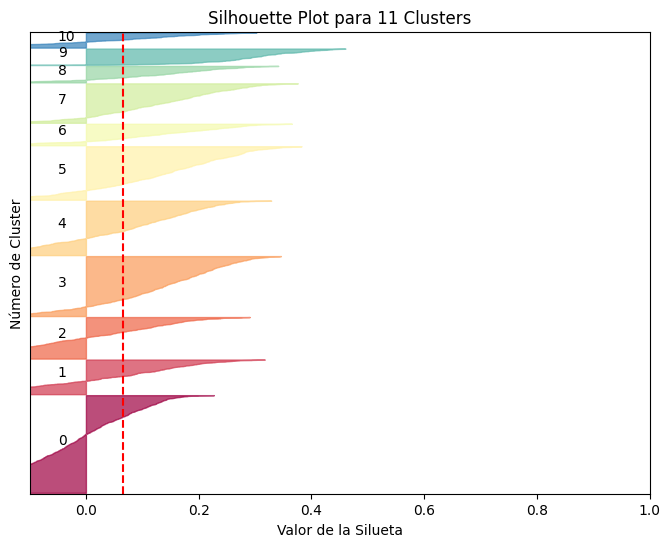

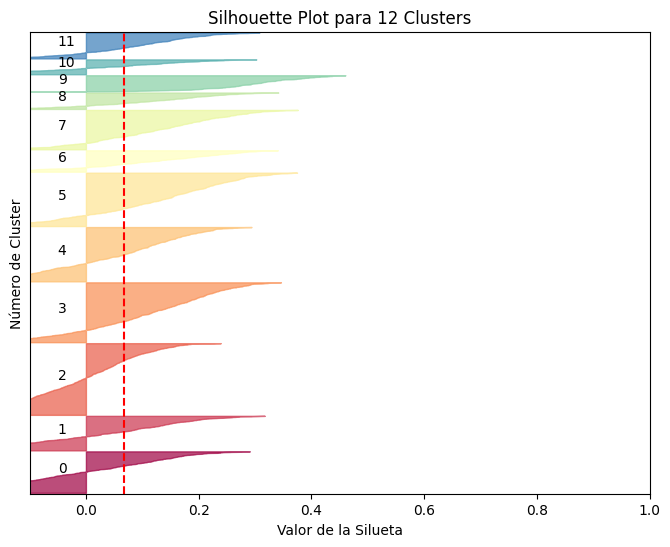

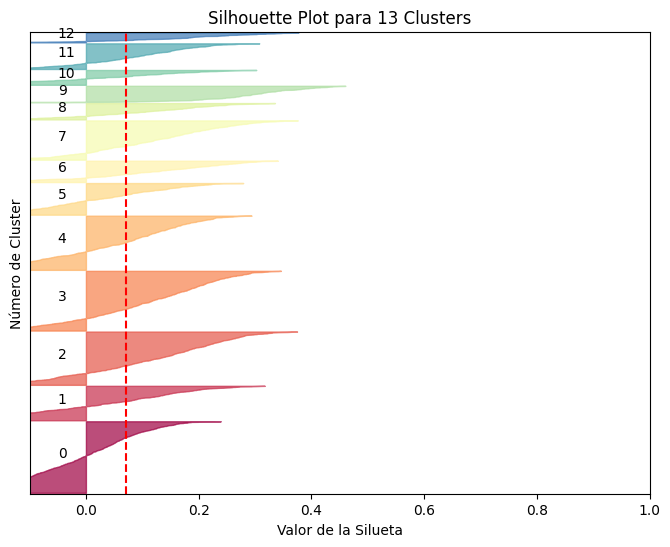

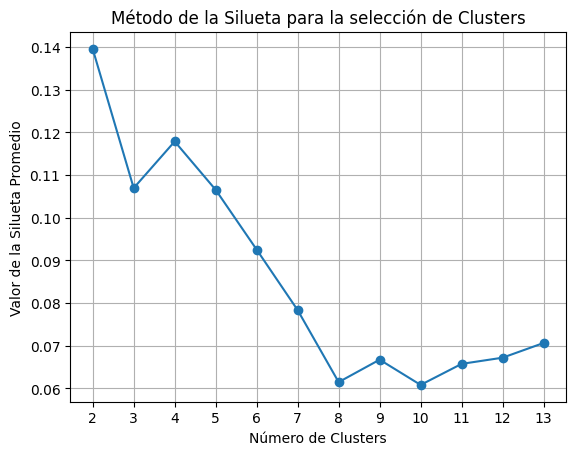

In [24]:
silueta_promedio = []

rango_clusters = range(2, 14)  # Probamos desde 2 hasta 15 clusters
for k in rango_clusters:

    modelo_clustering = AgglomerativeClustering(n_clusters=k)

    etiquetas = modelo_clustering.fit_predict(X_df)

    valor_silueta = silhouette_score(X_df, etiquetas)

    valores_silueta_muestra = silhouette_samples(X_df, etiquetas)

    silueta_promedio.append(valor_silueta)

    datos_ordenados = [
        (etiqueta, valor) for etiqueta, valor in zip(etiquetas, valores_silueta_muestra)
    ]
    datos_ordenados.sort(key=lambda x: x[0])

    plt.figure(figsize=(8, 6))
    plt.title(f"Silhouette Plot para {k} Clusters")
    plt.xlabel("Valor de la Silueta")
    plt.ylabel("Número de Cluster")

    y_lower = 10
    for i in range(k):

        cluster_i_values = [
            valor for etiqueta, valor in datos_ordenados if etiqueta == i
        ]
        cluster_i_values.sort()

        size_cluster_i = len(cluster_i_values)
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(i / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_i_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=valor_silueta, color="red", linestyle="--")
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_df) + (k + 1) * 10])
    plt.show()

# Graficar la silueta promedio en función del número de clusters
plt.plot(rango_clusters, silueta_promedio, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Valor de la Silueta Promedio")
plt.title("Método de la Silueta para la selección de Clusters")
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()

Parece que Agnes funciona un poco peor que kmeans. Los clusters óptimos para Agnes son 3, y hay silouettes negativas. 

Anges optimo

In [25]:
# Número de clusters deseado
n_clusters = 3

# Crear una instancia del modelo AgglomerativeClustering
agnes = AgglomerativeClustering(n_clusters=n_clusters)

# Ajustar el modelo a tus datos
agnes.fit(X_df)
X_df_new = X_df.copy()
X_df_new["Cluster"] = kmeans.labels_

# Puedes explorar los resultados, por ejemplo, viendo la distribución de los datos en cada cluster
print(X_df_new["Cluster"].value_counts())

0    2533
1    2410
Name: Cluster, dtype: int64


In [26]:
print(accuracy_score(X_df_new["Cluster"].values, y))

0.7088812462067571


3. Creativity and innovation (1.0 pts)

Vamos a probar otros métodos de clustering

BIRCH

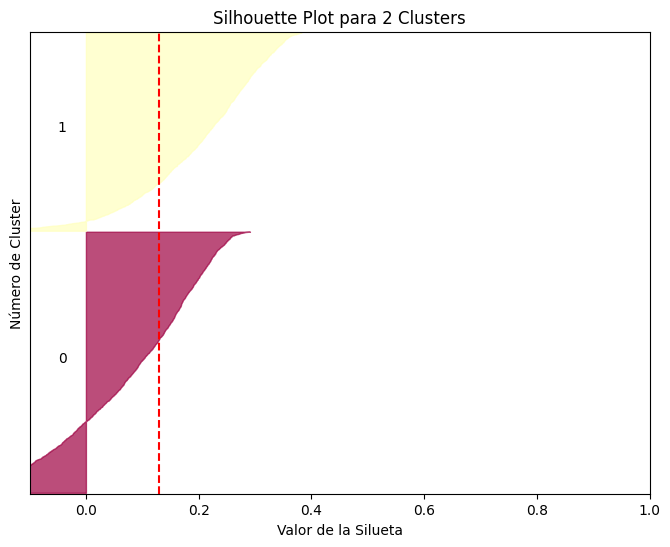

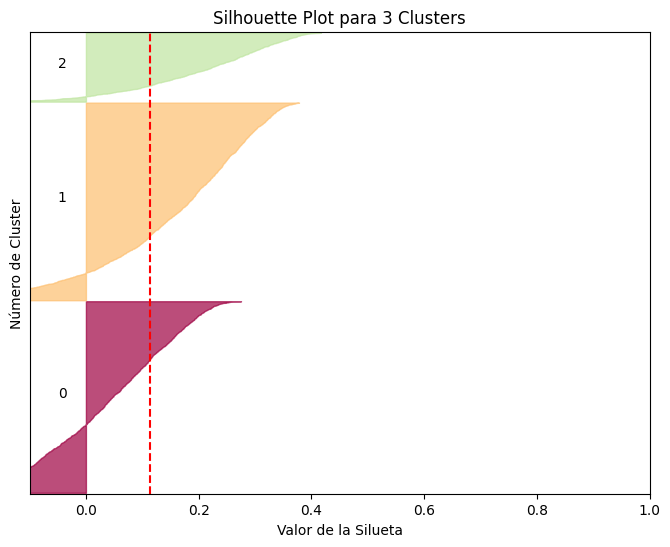

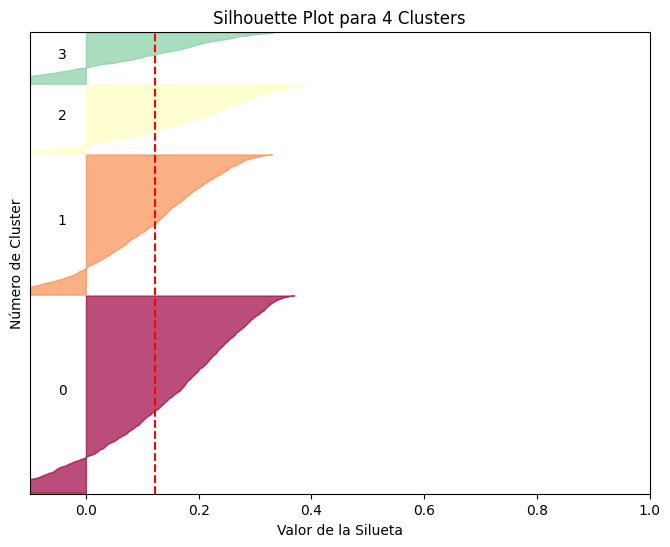

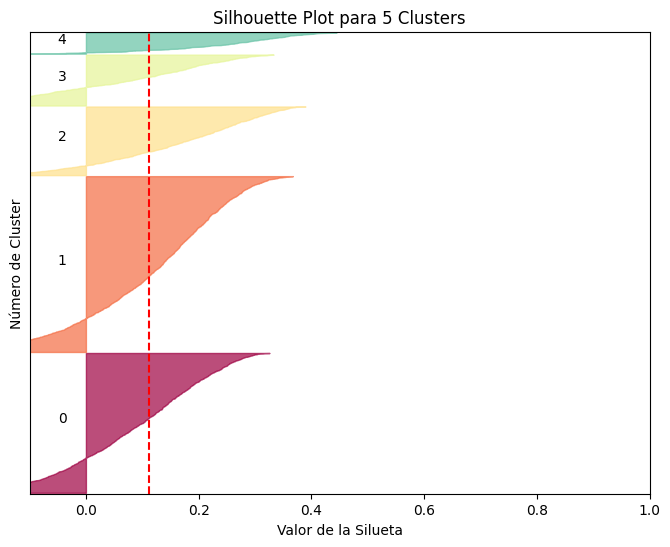

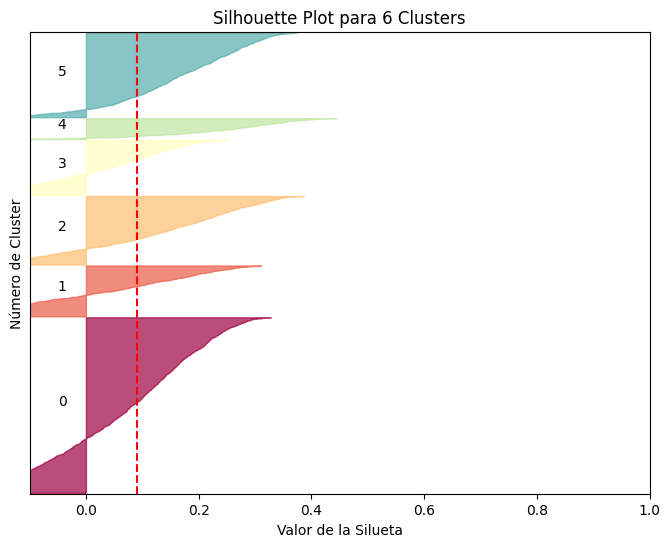

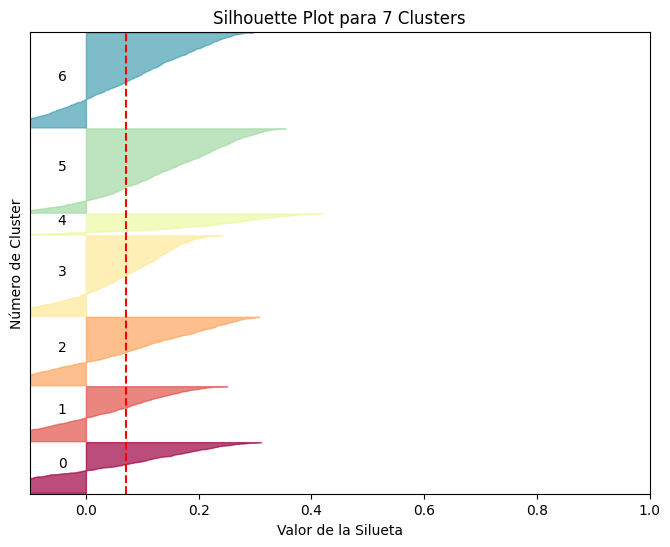

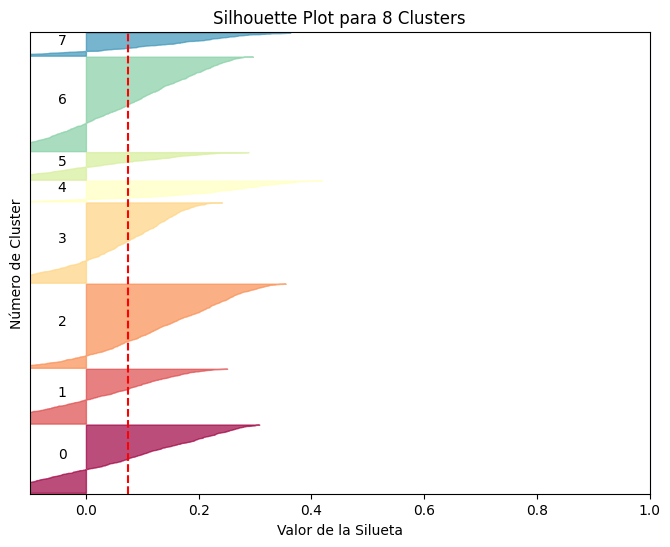

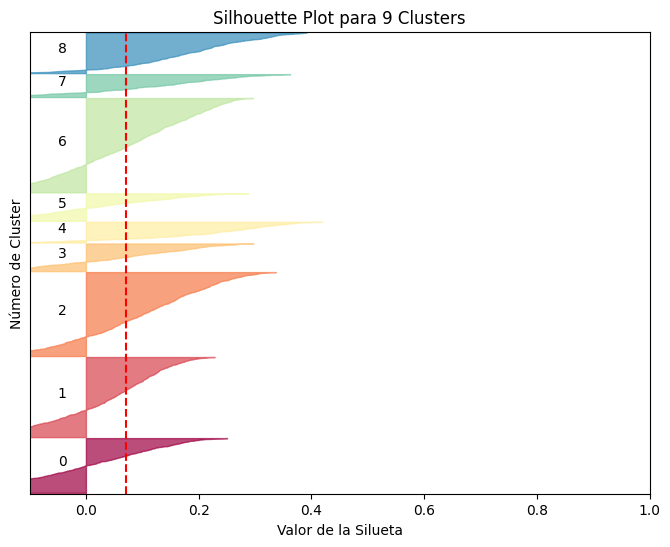

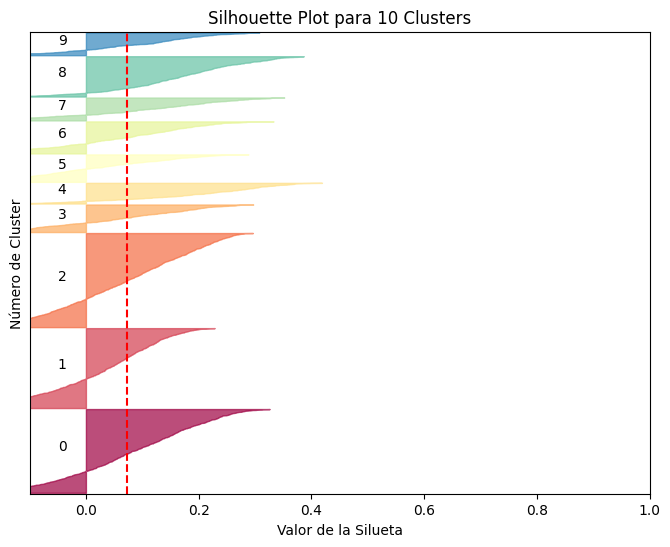

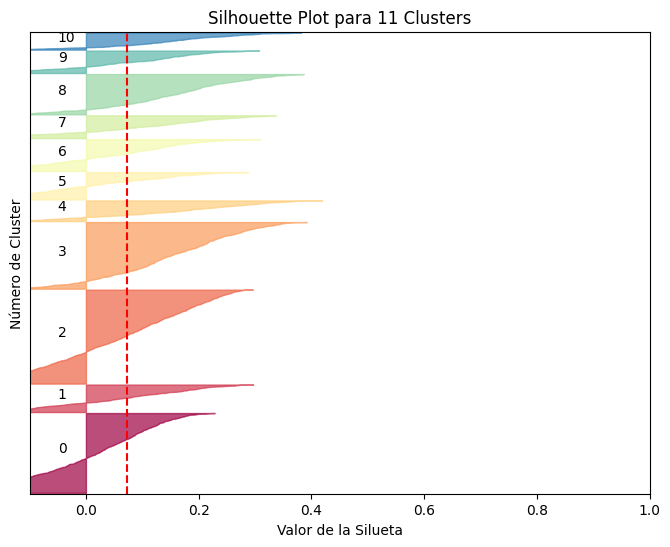

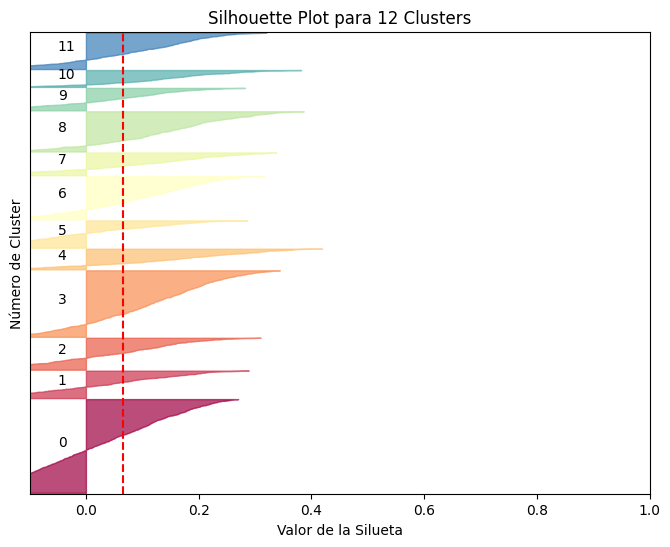

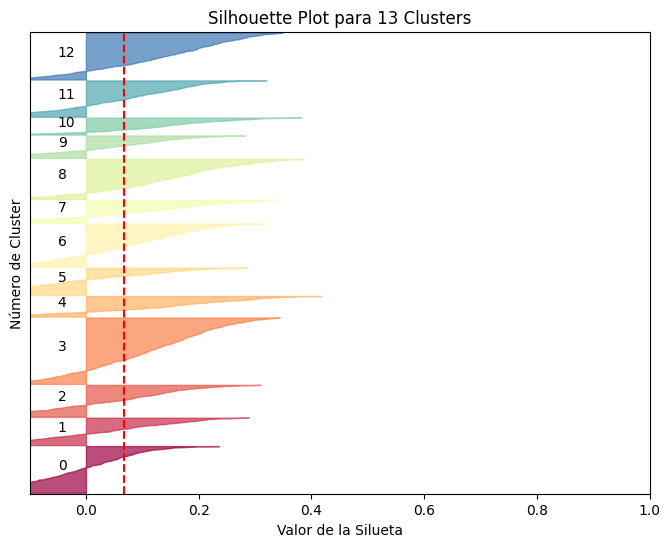

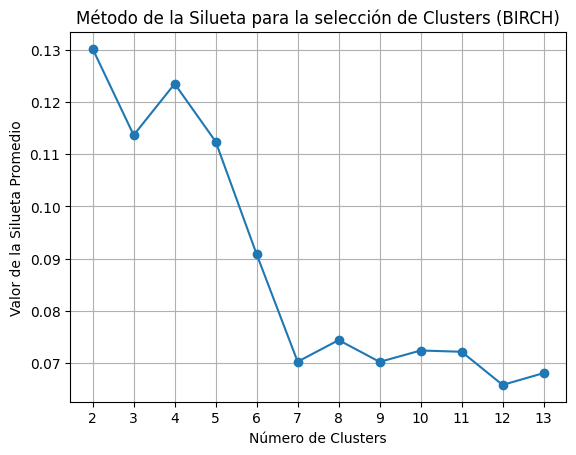

In [27]:
silueta_promedio = []
rango_clusters = range(2, 14)  # Probamos desde 2 hasta 15 clusters

for k in rango_clusters:
    # Crear una instancia del modelo de clustering BIRCH
    modelo_clustering = Birch(n_clusters=k)

    # Ajustar el modelo a tus datos
    modelo_clustering.fit(X_df)

    # Obtener las etiquetas de cluster asignadas a cada muestra
    etiquetas = modelo_clustering.labels_

    # Calcular la métrica de silueta para todo el conjunto de datos
    valor_silueta = silhouette_score(X_df, etiquetas)

    # Calcular la métrica de silueta para cada muestra individualmente
    valores_silueta_muestra = silhouette_samples(X_df, etiquetas)

    # Calcular el promedio de la métrica de silueta para todo el conjunto de datos
    silueta_promedio.append(valor_silueta)

    # Ordenar los datos para la visualización del gráfico de silueta
    datos_ordenados = [
        (etiqueta, valor) for etiqueta, valor in zip(etiquetas, valores_silueta_muestra)
    ]
    datos_ordenados.sort(key=lambda x: x[0])

    plt.figure(figsize=(8, 6))
    plt.title(f"Silhouette Plot para {k} Clusters")
    plt.xlabel("Valor de la Silueta")
    plt.ylabel("Número de Cluster")

    y_lower = 10
    for i in range(k):
        cluster_i_values = [
            valor for etiqueta, valor in datos_ordenados if etiqueta == i
        ]
        cluster_i_values.sort()

        size_cluster_i = len(cluster_i_values)
        y_upper = y_lower + size_cluster_i

        color = plt.colormaps.get_cmap("Spectral")(i / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_i_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=valor_silueta, color="red", linestyle="--")
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X_df) + (k + 1) * 10])
    plt.show()

# Graficar la silueta promedio en función del número de clusters
plt.plot(rango_clusters, silueta_promedio, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Valor de la Silueta Promedio")
plt.title("Método de la Silueta para la selección de Clusters (BIRCH)")
plt.xticks(rango_clusters)
plt.grid(True)
plt.show()

Birch óptimo

In [28]:
# Número de clusters deseado
n_clusters = 2

# Crear una instancia del modelo BIRCH
birch = Birch(n_clusters=n_clusters)

# Ajustar el modelo a tus datos
birch.fit(X_df)
X_df_new = X_df.copy()
X_df_new["Cluster"] = kmeans.labels_

# Puedes explorar los resultados, por ejemplo, viendo la distribución de los datos en cada cluster
print(X_df_new["Cluster"].value_counts())

# Explorar los resultados
print(X_df_new["Cluster"].value_counts())

0    2533
1    2410
Name: Cluster, dtype: int64
0    2533
1    2410
Name: Cluster, dtype: int64


In [29]:
print(accuracy_score(X_df_new["Cluster"].values, y))

0.7088812462067571


MiniBatchKMeans

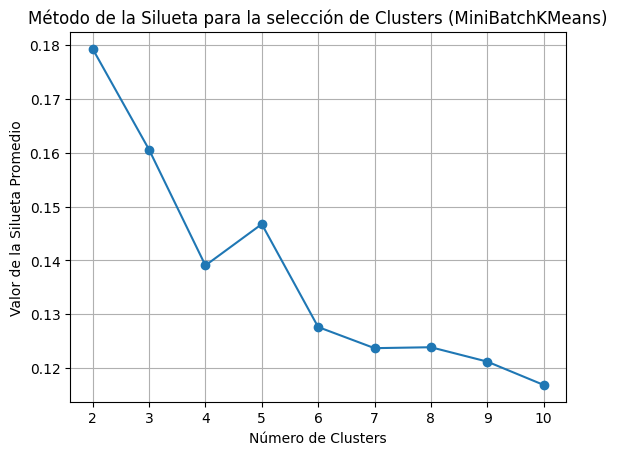

In [30]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Lista para almacenar los valores de la silueta para cada número de clusters probado
silueta = []

# Rango de número de clusters a probar
rango_clusters = range(2, 11)  # Probamos desde 2 hasta 10 clusters

# Aplicar MiniBatchKMeans para diferentes números de clusters y calcular la silueta
for k in rango_clusters:
    # Crear una instancia del modelo MiniBatchKMeans
    modelo_clustering = MiniBatchKMeans(n_clusters=k, n_init=3)

    # Ajustar el modelo a tus datos
    modelo_clustering.fit(X_df)

    # Obtener las etiquetas de cluster asignadas a cada muestra
    etiquetas = modelo_clustering.labels_

    # Calcular la métrica de silueta para todo el conjunto de datos
    valor_silueta = silhouette_score(X_df, etiquetas)

    # Almacenar la métrica de silueta para este número de clusters
    silueta.append(valor_silueta)

# Graficar la silueta en función del número de clusters
plt.plot(rango_clusters, silueta, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Valor de la Silueta Promedio")
plt.title("Método de la Silueta para la selección de Clusters (MiniBatchKMeans)")
plt.grid(True)
plt.show()

MiniBatchKMeans optimo

In [31]:
# Número de clusters deseado
n_clusters = 2

# Crear una instancia del modelo MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, random_state=42)

# Ajustar el modelo a tus datos
minibatch_kmeans.fit(X_df)

X_df_new = X_df.copy()
X_df_new["Cluster"] = minibatch_kmeans.labels_

# Explorar los resultados
print(X_df_new["Cluster"].value_counts())

# También puedes examinar los centroides de los clusters
centroides = pd.DataFrame(minibatch_kmeans.cluster_centers_, columns=columnas_xx)
print(centroides)

0    2759
1    2184
Name: Cluster, dtype: int64
   ExternalRiskEstimate  NetFractionRevolvingBurden  AverageMInFile  \
0              0.495308                   -0.469450        0.376832   
1             -0.662041                    0.644535       -0.532648   

   MSinceOldestTradeOpen  PercentTradesWBalance  PercentInstallTrades  \
0               0.400431              -0.451085             -0.239943   
1              -0.556396               0.642488              0.334806   

   NumSatisfactoryTrades  NumTotalTrades  PercentTradesNeverDelq  \
0               0.356512        0.322616                0.295401   
1              -0.478691       -0.447469               -0.385256   

   MSinceMostRecentInqexcl7days  
0                      0.148768  
1                     -0.201328  


In [32]:
print(
    accuracy_score(X_df_new["Cluster"].values, y)
)  # Estos valores van a cambiar en función de la codificación que haga el cluster

0.6939105806190573
